# Test FeatureMAP on synthetic data with cycle model.

In [1]:
import featuremap

import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)

/Users/uqyyao4/opt/anaconda3/envs/featmap/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Download the synthetic data by BEELINE model.

In [2]:

# !curl -o BEELINE-data.zip https://zenodo.org/records/3701939/files/BEELINE-data.zip?download=1

# !unzip BEELINE-data.zip



Read the expression data and pseudotime.

In [3]:
import pandas as pd

# Cycle data
data = pd.read_csv('./BEELINE-data/inputs/Synthetic/dyn-CY/dyn-CY-5000-1/ExpressionData.csv', index_col=0).T
data_pseudotime = pd.read_csv('./BEELINE-data/inputs/Synthetic/dyn-CY/dyn-CY-5000-1/Pseudotime.csv', index_col=0)
# replace Nan with 0
data_pseudotime.fillna(0, inplace=True)
# sum PseudoTime1 and PseudoTime2 
data_pseudotime = data_pseudotime.sum(axis=1)



<Axes: >

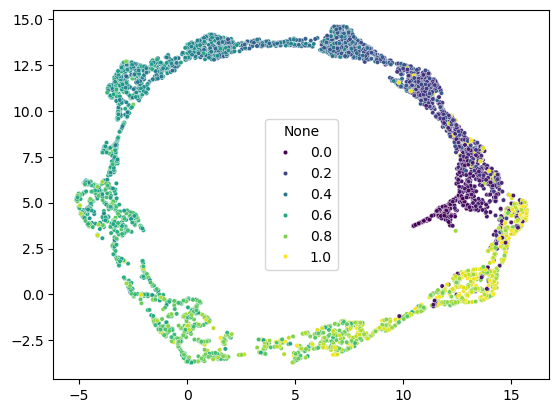

In [4]:
import umap
emb_umap = umap.UMAP().fit_transform(data)
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=emb_umap[:, 0], y=emb_umap[:, 1],hue=data_pseudotime, palette='viridis', s=10)

FeatureMAP expression embedding.

In [5]:
# from featuremap import featuremap_
import importlib
# importlib.reload(featuremap_)

emb_featuremap = featuremap.FeatureMAP(
                    random_state=42,
                    output_variation=False,
                    verbose=True,
                    ).fit(data)

FeatureMAP(random_state=42, verbose=True)
Tue Jun  4 12:14:59 2024 Construct fuzzy simplicial set
Tue Jun  4 12:14:59 2024 Finding Nearest Neighbors
Tue Jun  4 12:14:59 2024 Building RP forest with 9 trees
Tue Jun  4 12:14:59 2024 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	Stopping threshold met -- exiting after 2 iterations
Tue Jun  4 12:15:00 2024 Finished Nearest Neighbor Search
Tue Jun  4 12:15:00 2024 Construct embedding
Tue Jun  4 12:15:01 2024 Computing tangent space
Tue Jun  4 12:15:49 2024 Average over 27 times
Tue Jun  4 12:15:51 2024 Average time is 1.9801709651947021
Tue Jun  4 12:15:51 2024 Tangent_space_approximation time is 50.31758499145508
Tue Jun  4 12:15:51 2024 Tangent space embedding


/Users/uqyyao4/opt/anaconda3/envs/featmap/lib/python3.9/site-packages/numba/core/decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


Tue Jun  4 12:16:08 2024 Tangent_space_embedding time is 17.04863715171814
Tue Jun  4 12:16:08 2024 Start optimizing layout


Epochs completed: 100%| ██████████ 600/600 [00:44]

Tue Jun  4 12:16:53 2024 Optimize layout time is 44.734241008758545
Tue Jun  4 12:16:53 2024 Finished embedding


In [6]:
from featuremap import features
import importlib
importlib.reload(features)

adata = features.create_adata(X=data, emb_featuremap=emb_featuremap)

mu is not added to adata


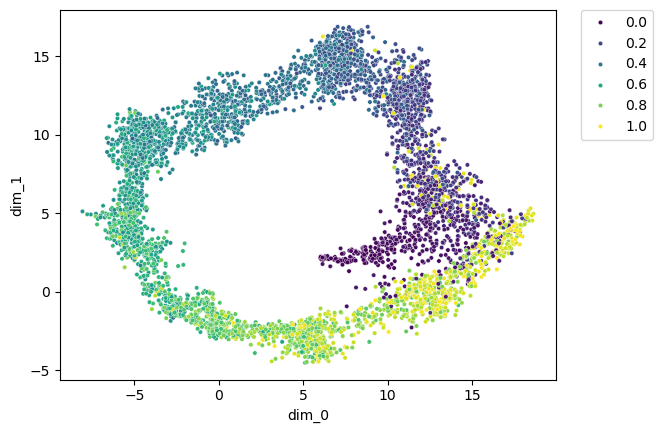

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=100)

embedding_df = pd.DataFrame(adata.obsm["X_featmap"], index=adata.obs_names, columns=['dim_0', 'dim_1'])
embedding_df['pseudotime'] = data_pseudotime
sns.scatterplot(x='dim_0', y='dim_1',hue='pseudotime', data=embedding_df, palette='viridis', s=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



FeatureMAP variation embedding.

In [8]:
# from featuremap import featuremap_
# import importlib
# importlib.reload(featuremap_)

emb_featuremap = featuremap.FeatureMAP(
                    random_state=42,
                    output_variation=True,
                    min_dist=0.5,
                    # verbose=True,
                    threshold=0.9
                    ).fit_transform(data)

adata.obsm["X_featmap_v"] = emb_featuremap

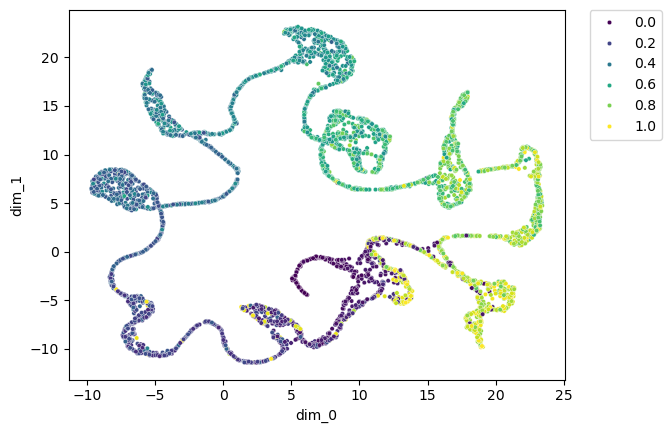

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=100)

embedding_df = pd.DataFrame(adata.obsm["X_featmap_v"], index=data.index, columns=['dim_0', 'dim_1'])
embedding_df['pseudotime'] = data_pseudotime
sns.scatterplot(x='dim_0',y='dim_1', hue='pseudotime', data=embedding_df, palette='viridis', s=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [10]:
# from featuremap import featuremap_
# import importlib
# importlib.reload(featuremap_)

emb_featuremap = featuremap.FeatureMAP(
                    n_components=3,
                    random_state=42,
                    output_variation=True,
                    min_dist=0.5,
                    # verbose=True,
                    threshold=0.9
                    ).fit_transform(data)

adata.obsm["X_featmap_v_3d"] = emb_featuremap

In [11]:
import plotly   
importlib.reload(plotly)
# importlib.reload(nbformat)
import plotly.express as px
fig_3d = px.scatter_3d(
    emb_featuremap, 
    x=0, y=1, z=2,
    color=data_pseudotime, 
    # labels={'color': 'species'}
    color_continuous_scale='viridis',
    # color_discrete_sequence=[ 'orange', 'blue']
)
fig_3d.update_traces(marker_size=2) # Modify the point size
fig_3d.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig_3d.show()

# save the plot 
# fig_3d.write_html("3d_plot.html")

Plot features.

In [12]:
from featuremap import features
import importlib
importlib.reload(features)

# Starting point index
# Randomly select a starting point by cells with small pseudotime
import numpy as np
start_point_index = np.random.choice(np.where(data_pseudotime < 0.1)[0])
features.pseudotime_mst(adata, 42, start_point_index)


Plotting g1...
Start matrix multiplication
Finish matrix multiplication in 0.0014531612396240234


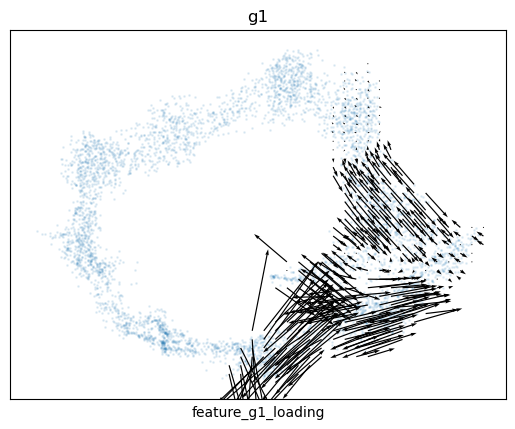

Plotting g2...
Start matrix multiplication
Finish matrix multiplication in 0.00048804283142089844


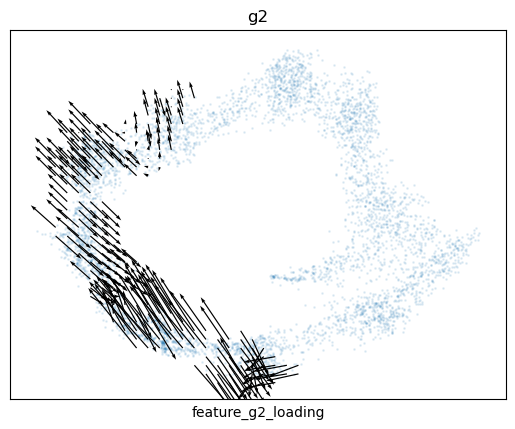

Plotting g3...
Start matrix multiplication
Finish matrix multiplication in 0.0004200935363769531


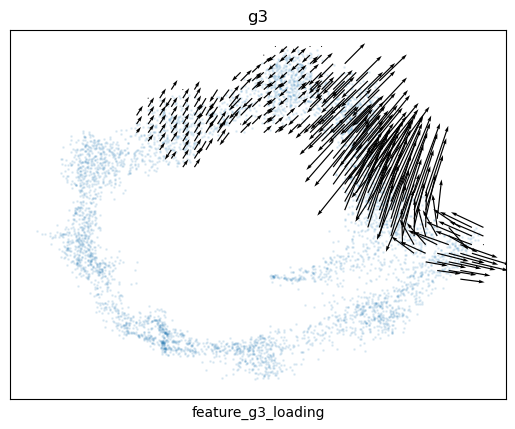

Plotting g4...
Start matrix multiplication
Finish matrix multiplication in 0.0004620552062988281


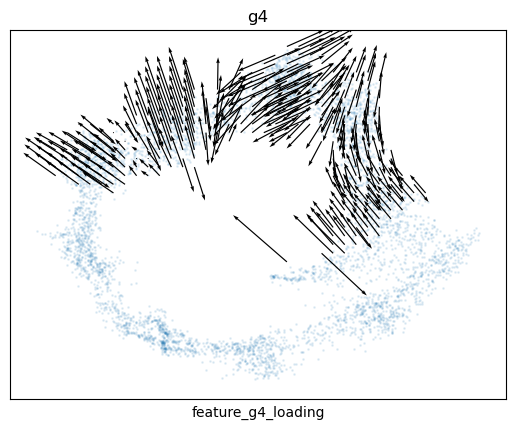

Plotting g5...
Start matrix multiplication
Finish matrix multiplication in 0.0005290508270263672


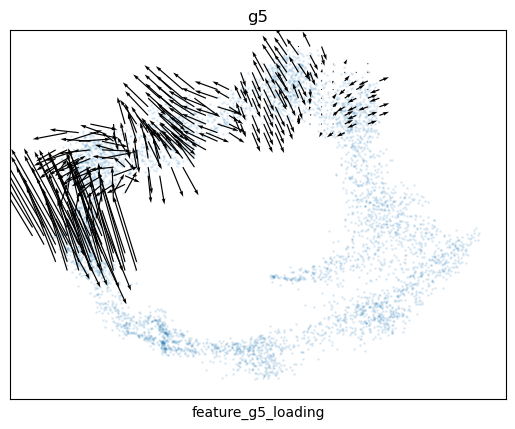

Plotting g6...
Start matrix multiplication
Finish matrix multiplication in 0.0010669231414794922


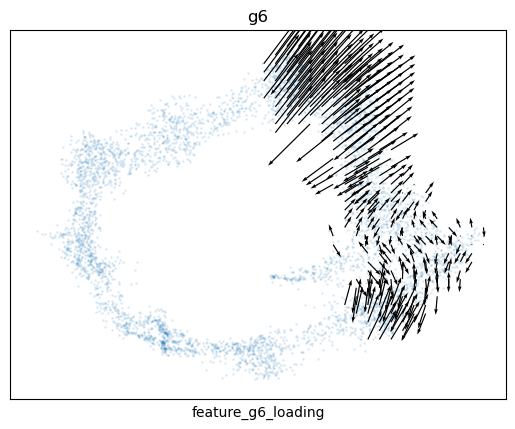

<Figure size 640x480 with 0 Axes>

In [18]:
from featuremap import features
import importlib
importlib.reload(features)

from featuremap.features import feature_projection, plot_one_feature
feature = data.columns

# adata.obs['feat_pseudotime'] = data_pseudotime

for f in feature:
    print(f'Plotting {f}...')
    feature_projection(adata, feature=f)
    plot_one_feature(adata, feature=f, ratio=0.5, density=0.8, embedding='X_featmap', pseudotime='feat_pseudotime', pseudotime_adjusted=False)    


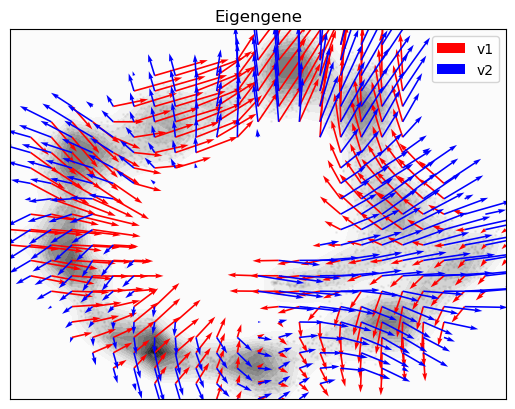

In [14]:
from featuremap import features
import importlib
importlib.reload(features)

features.plot_gauge_both(adata, density=0.5,  embedding='X_featmap',)

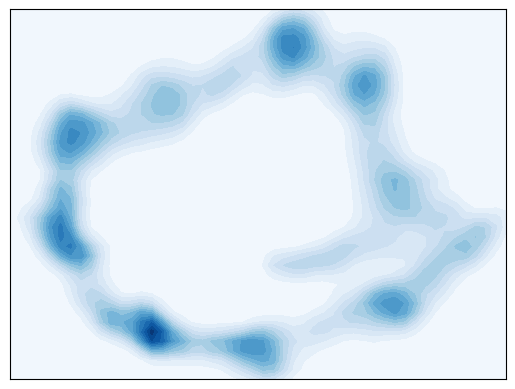

<Figure size 640x480 with 0 Axes>

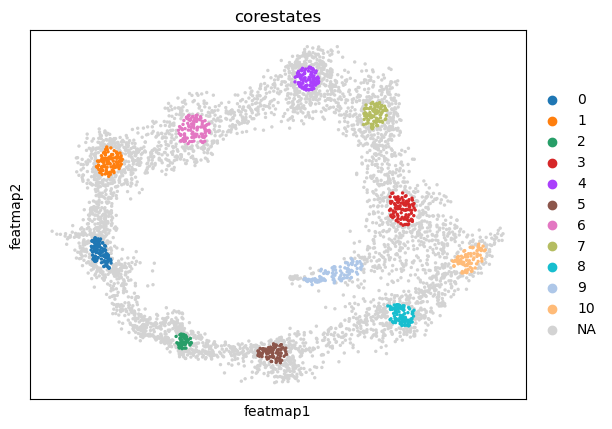

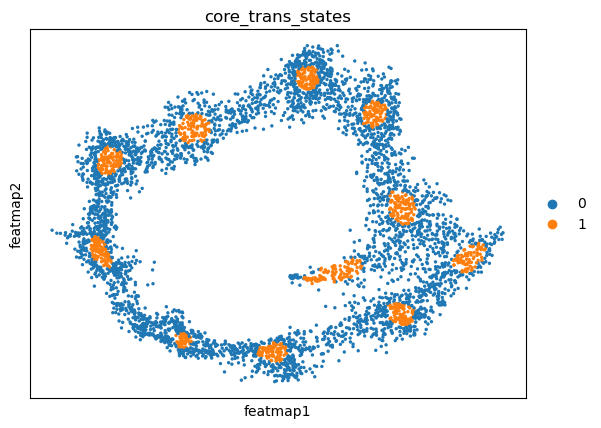

In [15]:
##################################
# Contour plot to show the density
######################################
from featuremap import core_transition_state
import importlib
importlib.reload(core_transition_state)

from featuremap.core_transition_state import plot_density
plot_density(adata)

#%%
#######################################################
# Compute core-states based on clusters
#########################################################

from featuremap.core_transition_state import core_transition_state
core_transition_state(adata)



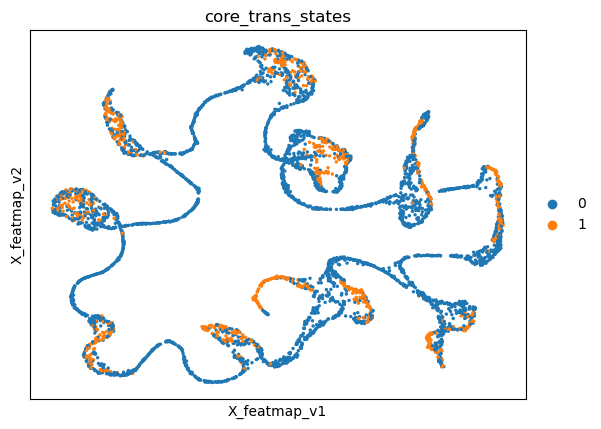

In [16]:
import scanpy as sc
sc.pl.embedding(adata, basis='X_featmap_v', color='core_trans_states',  )

In [17]:

core_trans_states = adata.obs['core_trans_states'].values
import plotly   
importlib.reload(plotly)
# importlib.reload(nbformat)
import plotly.express as px
fig_3d = px.scatter_3d(
    emb_featuremap, 
    x=0, y=1, z=2,
    color=core_trans_states, 
    # labels={'color': 'species'}
    # color_continuous_scale='viridis',
    color_discrete_sequence=[ 'blue', 'orange',]
)
fig_3d.update_traces(marker_size=2) # Modify the point size
fig_3d.update_layout(
    autosize=False,
    width=500,
    height=500,
)
fig_3d.show()

# save the plot
# fig_3d.write_html("3d_plot_core_trans_states.html")